# Calculating and Visualizing Autocorrelation

**Abid Ali**

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

Skype: abd.soft


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
bikesharing_data = pd.read_csv('data/bike_sharing_hourly.csv', index_col=0)

bikesharing_data.head(10)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [6]:
bikesharing_data[['temp', 'hum']].describe()


,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [7]:
bikesharing_data.shape


(17379, 16)

In [8]:
bikesharing_data[['temp', 'hum']].corr()


,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [9]:
bikesharing_data['temp'].autocorr(lag=2)

0.980684914901323

In [10]:
bikesharing_data['temp'].autocorr(lag=12)

0.8250709628213121

In [11]:
temp_data = bikesharing_data['temp']

In [12]:
temp_data.autocorr(lag=102)

0.7658269022298079

In [13]:
temp_data.autocorr(lag=1002)

0.5654240428575001

In [14]:
hum_data = bikesharing_data['hum']
hum_data.autocorr(lag=12)

0.20088188422738348

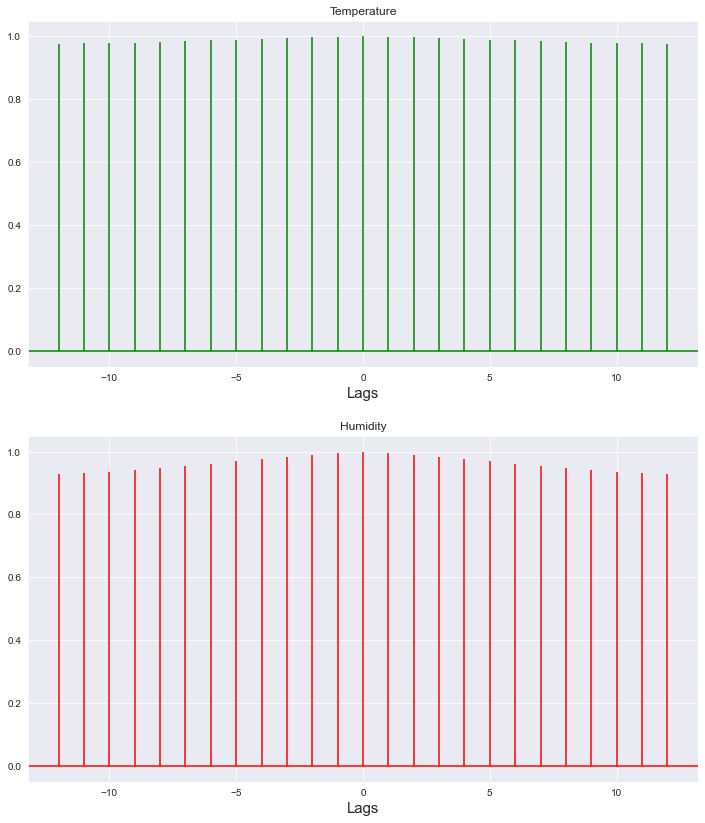

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

ax1.acorr(bikesharing_data['temp'],
          maxlags=12, color='green')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'],
          maxlags=12, color='red')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()

In [17]:
# Temperature is strongly correlated with itself after 24 hours of lag.
bikesharing_data['temp'].autocorr(lag=24)

0.9148730709671985

In [19]:
# Humidity is not much strongly correlated with itself after 24 hours of lag, but still has a positive correlation.
bikesharing_data['hum'].autocorr(lag=24)

0.4948813054393592

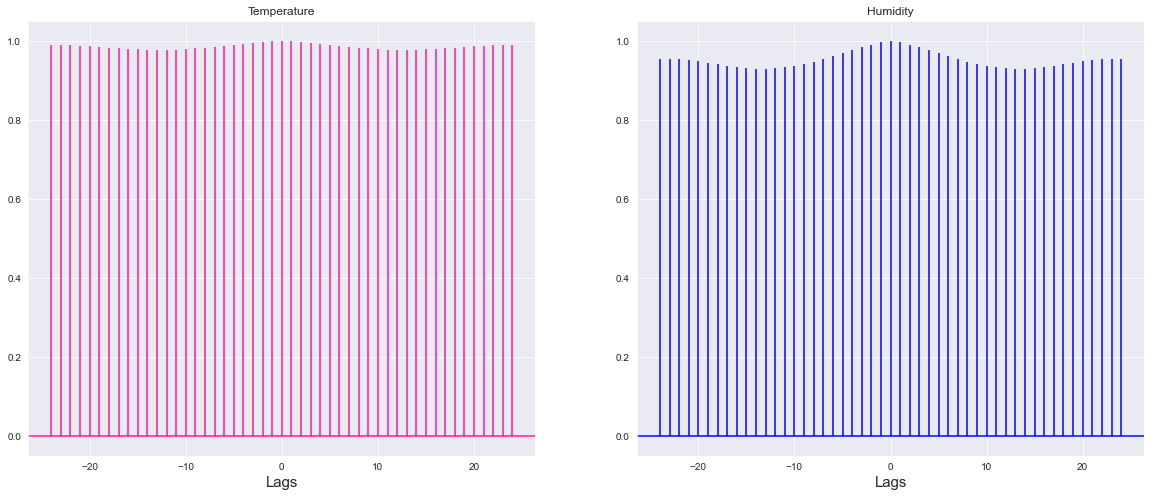

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['temp'],
          maxlags=24, color='deeppink')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'],
          maxlags=24, color='blue')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()

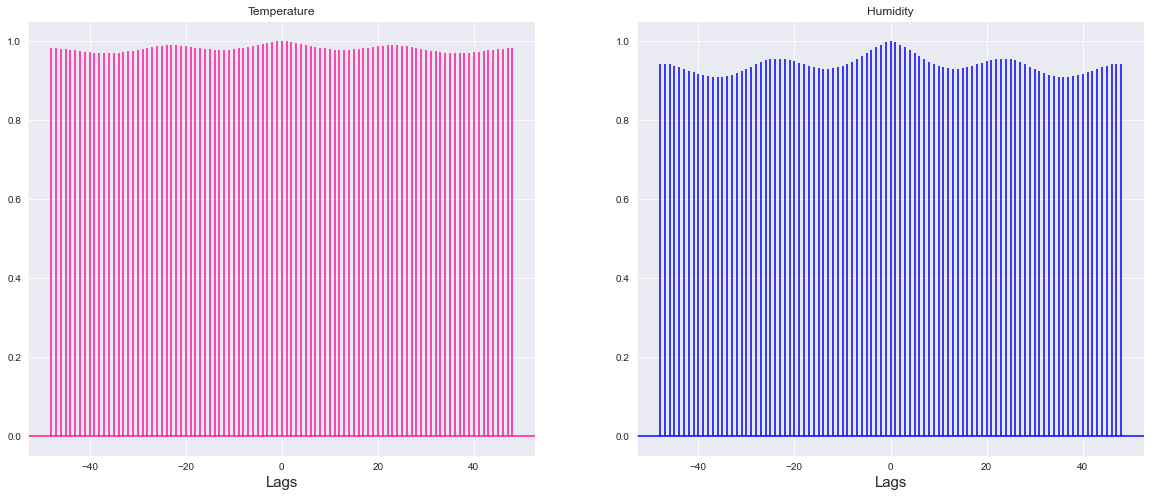

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['temp'],
          maxlags=48, color='deeppink')
ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'],
          maxlags=48, color='blue')
ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()
